In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e7767fb48b854af082594cf9b01109c0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NUsr_3tnOflftlCKSWfyGgKriwHQ_FpPkgO_uOf2_ceq',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e7767fb48b854af082594cf9b01109c0.get_object(Bucket='bankdatascience-donotdelete-pr-amdicwco0zoreh',Key='bank-additional-full-mod.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

BMDSE_bafmv1 = pd.read_csv(body)
BMDSE_bafmv1.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
BMDSE_bafmv1.shape

(41188, 21)

In [4]:
BMDSE_bafmv1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [5]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.

body = client_e7767fb48b854af082594cf9b01109c0.get_object(Bucket='bankdatascience-donotdelete-pr-amdicwco0zoreh',Key='bank-full.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

BMDSE_bfv1 = pd.read_csv(body)
BMDSE_bfv1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
BMDSE_bfv1.shape

(45211, 17)

In [7]:
BMDSE_bfv1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Here is the description of the columns

1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
    
related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

other attributes:  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

social and economic context attributes  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
  
Output variable (desired target):  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')  

In [8]:
BMDSE_bafmv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

#### We will analyze the label (y)

In [9]:
BMDSE_bafmv1.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

We can see that y has more 'no' than 'yes' answers. This will influence the choice of our performance metrics - ROC is better metric than accuracy in cases where the number of records per class is not balanced

#### Now we will analyze feature Marital

In [10]:
BMDSE_bafmv1.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


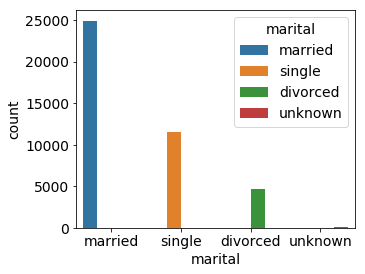

In [11]:
plt.rcParams['figure.figsize']=(5,4)
plt.rcParams['font.family'] = ('arial')
plt.rcParams['font.size']=(14)
sns.countplot(x='marital', hue='marital', data=BMDSE_bafmv1);

In [12]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['marital']).value_counts()

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

#### Now we will analyze the Age

In [13]:
BMDSE_bafmv1.age.value_counts().sort_values()

95       1
94       1
87       1
98       2
91       2
89       2
92       4
17       5
84       7
86       8
79      14
85      15
83      17
82      17
81      20
77      20
88      22
75      24
67      26
78      27
18      28
80      31
74      32
68      33
73      34
72      34
69      34
76      34
19      42
65      44
      ... 
54     684
26     698
56     704
53     733
51     754
52     779
49     839
27     851
50     875
47     928
48     979
28    1001
44    1011
46    1030
43    1055
45    1103
42    1142
40    1161
41    1278
38    1407
39    1432
29    1453
37    1475
30    1714
34    1745
35    1759
36    1780
33    1833
32    1846
31    1947
Name: age, Length: 78, dtype: int64

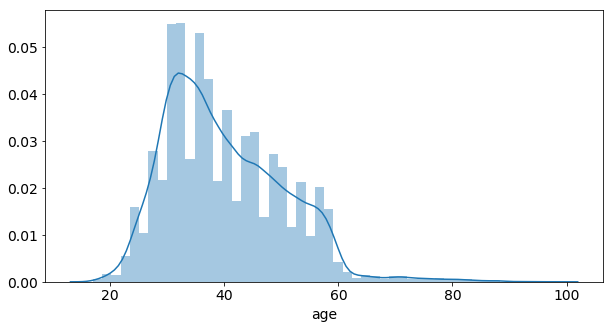

In [14]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(BMDSE_bafmv1['age'])
plt.show()

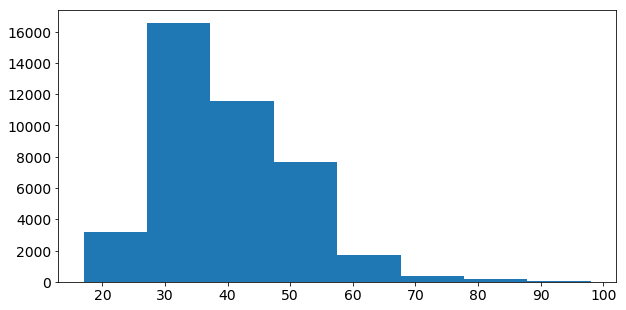

In [15]:
plt.hist(BMDSE_bafmv1['age'], bins=8)
plt.show()

In [16]:
BMDSE_bafmv1['age_binned'] = pd.cut(BMDSE_bafmv1['age'], 8)
BMDSE_bafmv1['age_binned'].value_counts()

(27.125, 37.25]     16553
(37.25, 47.375]     11547
(47.375, 57.5]       7641
(16.919, 27.125]     3215
(57.5, 67.625]       1696
(67.625, 77.75]       345
(77.75, 87.875]       157
(87.875, 98.0]         34
Name: age_binned, dtype: int64

In [17]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['age_binned']).value_counts()

age_binned        y  
(16.919, 27.125]  no      2630
                  yes      585
(27.125, 37.25]   no     14758
                  yes     1795
(37.25, 47.375]   no     10608
                  yes      939
(47.375, 57.5]    no      6919
                  yes      722
(57.5, 67.625]    no      1347
                  yes      349
(67.625, 77.75]   no       193
                  yes      152
(77.75, 87.875]   yes       82
                  no        75
(87.875, 98.0]    no        18
                  yes       16
Name: y, dtype: int64

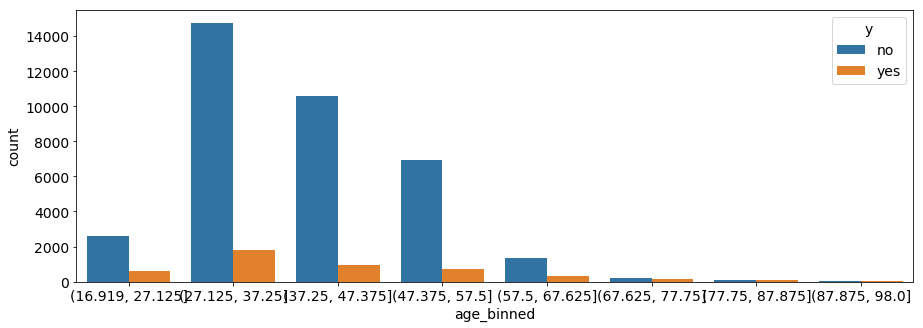

In [18]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(x='age_binned', hue='y', data=BMDSE_bafmv1)

#### Now, we will analyze Education

In [19]:
BMDSE_bafmv1.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [20]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['education']).value_counts()

education            y  
basic.4y             no      3748
                     yes      428
basic.6y             no      2104
                     yes      188
basic.9y             no      5572
                     yes      473
high.school          no      8484
                     yes     1031
illiterate           no        14
                     yes        4
professional.course  no      4648
                     yes      595
university.degree    no     10498
                     yes     1670
unknown              no      1480
                     yes      251
Name: y, dtype: int64

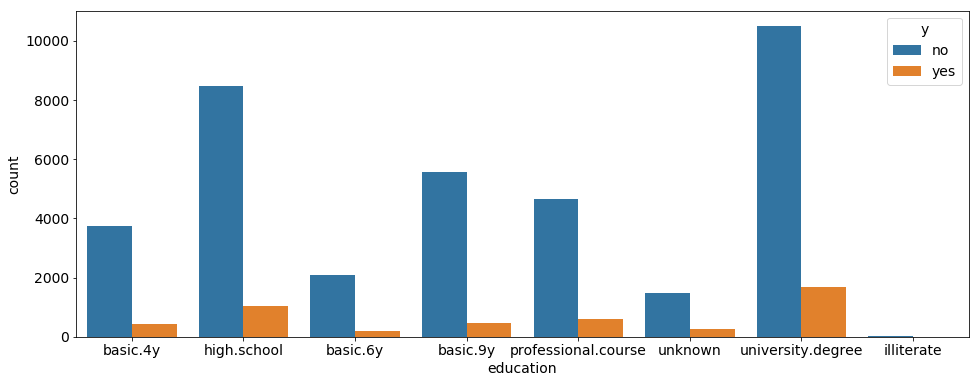

In [21]:
plt.rcParams['figure.figsize']=(16,6)
sns.countplot(x='education',hue='y',data=BMDSE_bafmv1)

#### Now, we will analyze Job

In [22]:
BMDSE_bafmv1['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['job']).value_counts()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


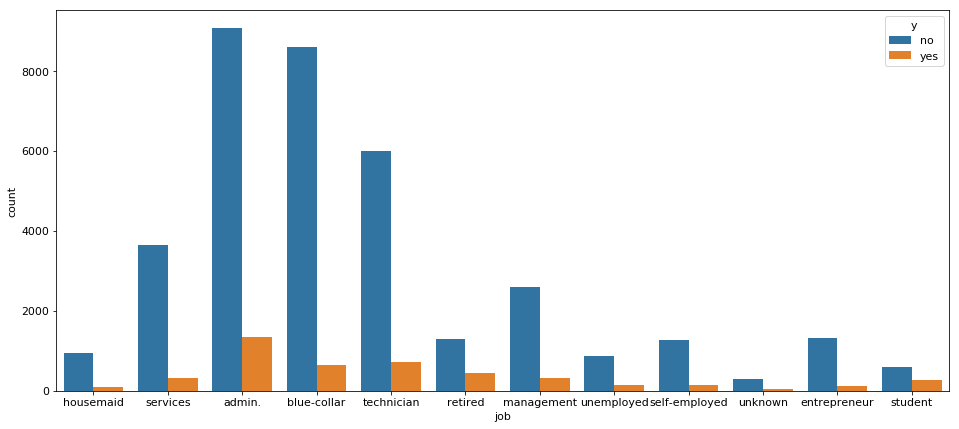

In [25]:
plt.rcParams['figure.figsize']=(16,7)
plt.rcParams['font.size']=(11)
sns.countplot(x='job', hue='y', data=BMDSE_bafmv1)

#### Now we will analyze Loan

In [26]:
BMDSE_bafmv1['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [27]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['loan']).value_counts()

loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: y, dtype: int64

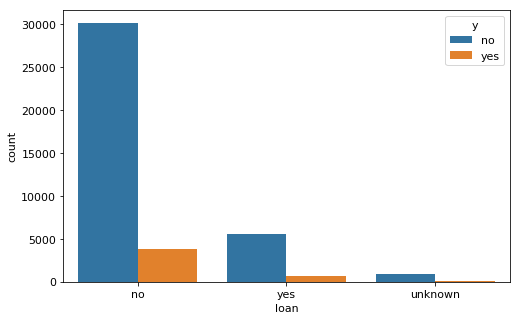

In [28]:
plt.rcParams['figure.figsize']=(8,5)
sns.countplot(x='loan', hue='y', data=BMDSE_bafmv1)

#### Now we will analyze Previous

In [29]:
BMDSE_bafmv1['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [30]:
BMDSE_bafmv1['y'].groupby(BMDSE_bafmv1['previous']).value_counts()

previous  y  
0         no     32422
          yes     3141
1         no      3594
          yes      967
2         no       404
          yes      350
3         yes      128
          no        88
4         yes       38
          no        32
5         yes       13
          no         5
6         yes        3
          no         2
7         no         1
Name: y, dtype: int64

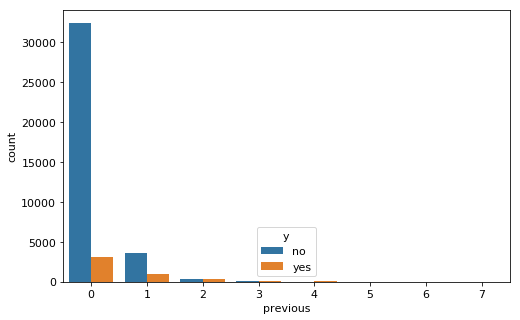

In [31]:
sns.countplot(x='previous', hue='y', data=BMDSE_bafmv1)

#### Convert categorical data in numerical values

In [32]:
# First, copy our DataFrame
BMDSE_bafmv1_num=BMDSE_bafmv1.copy()
# Then, iterate through all columns
for col in BMDSE_bafmv1_num.columns:
    #Select only those that have text in it (dtype : object)
    if BMDSE_bafmv1_num[col].dtype==object:
        # Convert this column into category so to use those category values for our label encoding
           BMDSE_bafmv1_num[col]=BMDSE_bafmv1_num[col].astype('category')
            # And replace the value of the column with the encoded variable using the cat.codes accessor
           BMDSE_bafmv1_num[col]=BMDSE_bafmv1_num[col].cat.codes

In [33]:
BMDSE_bafmv1_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_binned
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,"(47.375, 57.5]"
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,"(47.375, 57.5]"
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,"(27.125, 37.25]"
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,"(37.25, 47.375]"
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,"(47.375, 57.5]"


In [34]:
BMDSE_bafmv1_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null int8
marital           41188 non-null int8
education         41188 non-null int8
default           41188 non-null int8
housing           41188 non-null int8
loan              41188 non-null int8
contact           41188 non-null int8
month             41188 non-null int8
day_of_week       41188 non-null int8
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null int8
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int8
age_binned        41188 non-null category
dtypes: category(1), float64(5)

In [35]:
BMDSE_bafmv1_num['age_binned']=BMDSE_bafmv1_num['age_binned'].cat.codes

In [36]:
BMDSE_bafmv1_num.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_binned
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3


#### Using Data Refinery, I have combined the data from 'bank-additional-full-mod.csv' and 'revenue_estimates-csv' to add additional information about estaimted revenues of different customers. I expect this to help with prediction

In [37]:

body = client_e7767fb48b854af082594cf9b01109c0.get_object(Bucket='bankdatascience-donotdelete-pr-amdicwco0zoreh',Key='data_asset/bank-data-full-mod_7c41c9b3.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

BMDSE_bafmv2 = pd.read_csv(body)
BMDSE_bafmv2.head()


,age,age_group,job,marital,education,revenue_est,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,50,45-58,management,married,university.degree,90000.0,unknown,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,44,36-44,management,divorced,university.degree,90000.0,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,36-44,management,married,basic.6y,90000.0,no,no,no,telephone,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,52,45-58,management,married,university.degree,90000.0,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,57,45-58,management,married,university.degree,90000.0,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


I will perform again some data analysis to understand the dependencies

In [38]:
BMDSE_bafmv2['y'].groupby(BMDSE_bafmv2['revenue_est']).value_counts()

revenue_est  y  
20000.0      no      3110
             yes      684
40000.0      no      8616
             yes      638
50000.0      no      3646
             yes      323
60000.0      no     16415
             yes     2206
90000.0      no      2596
             yes      328
Name: y, dtype: int64

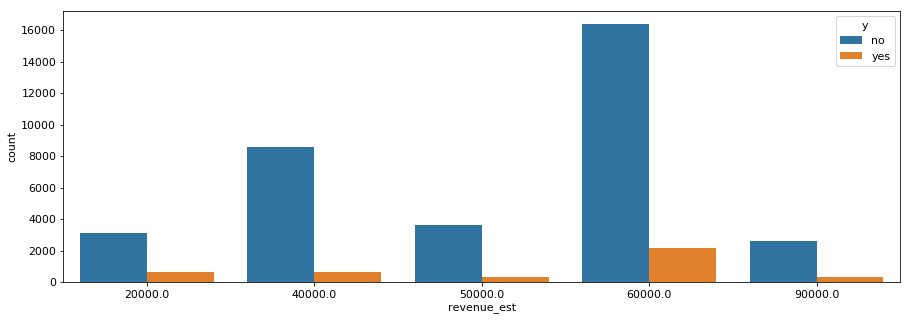

In [39]:
plt.rcParams['figure.figsize']=(15,5)
sns.countplot(x='revenue_est', hue='y', data=BMDSE_bafmv2)

#### Convert categorical data in numerical values

In [40]:
# First, copy our DataFrame
BMDSE_bafmv2_num=BMDSE_bafmv2.copy()
# Then, iterate through all columns
for col in BMDSE_bafmv2_num.columns:
    #Select only those that have text in it (dtype : object)
    if BMDSE_bafmv2_num[col].dtype==object:
        # Convert this column into category so to use those category values for our label encoding
           BMDSE_bafmv2_num[col]=BMDSE_bafmv2_num[col].astype('category')
            # And replace the value of the column with the encoded variable using the cat.codes accessor
           BMDSE_bafmv2_num[col]=BMDSE_bafmv2_num[col].cat.codes

In [41]:
BMDSE_bafmv2_num.head()

,age,age_group,job,marital,education,revenue_est,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,50,3,4,1,6,90000.0,1,0,2,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,44,2,4,0,6,90000.0,0,2,0,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,41,2,4,1,1,90000.0,0,0,0,1,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,52,3,4,1,6,90000.0,0,0,0,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,57,3,4,1,6,90000.0,0,0,0,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


### Perform scaling of the numeric values

In [42]:
all_features=['age','age_group','job','marital','education','default','housing','loan','month','day_of_week',
                  'duration','pdays','previous','poutcome','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','y']

In [43]:
from sklearn.preprocessing import MinMaxScaler

BMDSE_bafmv2_num_feature_columns=BMDSE_bafmv2_num[all_features]
BMDSE_bafmv2_num_features=BMDSE_bafmv2_num_feature_columns.values

# separate inputs from target values
X = BMDSE_bafmv2_num_features[:,0:17]
Y = BMDSE_bafmv2_num_features[:,18]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

print(rescaledX[0:10,:])
print(Y[0:10])

[[0.40740741 0.75       0.36363636 0.33333333 0.85714286 0.5
  0.         1.         0.66666667 0.25       0.03273688 1.
  0.         0.5        0.9375     0.69875292 0.60251046]
 [0.33333333 0.5        0.36363636 0.         0.85714286 0.
  1.         0.         0.66666667 0.25       0.03497357 1.
  0.         0.5        0.9375     0.69875292 0.60251046]
 [0.2962963  0.5        0.36363636 0.33333333 0.14285714 0.
  0.         0.         0.66666667 0.25       0.10756405 1.
  0.         0.5        0.9375     0.69875292 0.60251046]
 [0.43209877 0.75       0.36363636 0.33333333 0.85714286 0.
  0.         0.         0.66666667 0.25       0.03761692 1.
  0.         0.5        0.9375     0.69875292 0.60251046]
 [0.49382716 0.75       0.36363636 0.33333333 0.85714286 0.
  0.         0.         0.66666667 0.25       0.09373729 1.
  0.         0.5        0.9375     0.69875292 0.60251046]
 [0.32098765 0.5        0.36363636 0.33333333 0.85714286 0.5
  0.         1.         0.66666667 0.25       0.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# split data into train and test sets
seed = 9
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


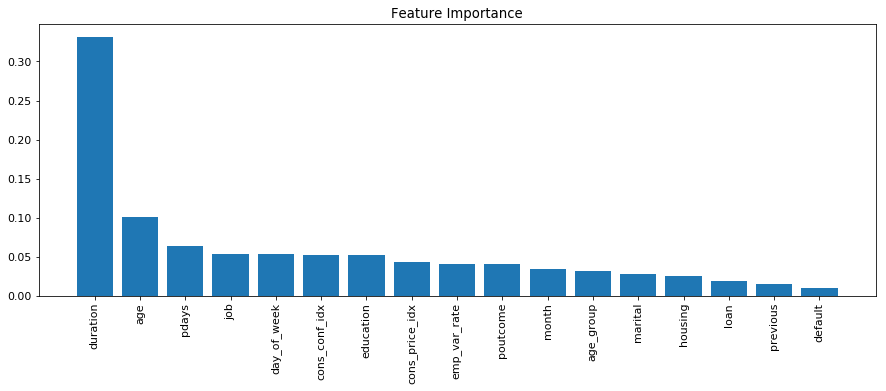

feature importances : 
[('default', 0.010513979888862737),
 ('previous', 0.01552616384886217),
 ('loan', 0.01909096141169806),
 ('housing', 0.025311992707625342),
 ('marital', 0.028262231531929326),
 ('age_group', 0.032261256897359925),
 ('month', 0.03386007167856984),
 ('poutcome', 0.0408909823136306),
 ('emp_var_rate', 0.041229895397410496),
 ('cons_price_idx', 0.04385531493620614),
 ('education', 0.05252081394270083),
 ('cons_conf_idx', 0.05259414303305573),
 ('day_of_week', 0.05300834179459217),
 ('job', 0.05416030352965066),
 ('pdays', 0.06438439676162125),
 ('age', 0.10108729558944703),
 ('duration', 0.3314418547367778)]


In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 19) 

# train the model 
BMDSE_bafmv2_RFCmodel = rfc.fit(X_train, y_train)

# Find feature importance, print it
importances = BMDSE_bafmv2_RFCmodel.feature_importances_
indices = np.argsort(importances)[::-1]
names = [all_features[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

import operator, pprint

formated_list = list(zip(all_features, importances))
sorted_list = sorted(formated_list, key = operator.itemgetter(1)) 
      
# printing importances of features
print("feature importances : ")
pprint.pprint(sorted_list)

In [46]:
# make predictions for the test data
MDSE_bafmv2_RFCpredictions = BMDSE_bafmv2_RFCmodel.predict(X_test)

y_true=sorted(y_test)
y_score=sorted(MDSE_bafmv2_RFCpredictions)
MDSE_bafmv2_RDF_roc_auc = roc_auc_score(y_true, y_score)

print("RandomForest ROC AUC score: %.2f%%" % (MDSE_bafmv2_RDF_roc_auc * 100.0))

RandomForest ROC AUC score: 86.28%


In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

# train the model
BMDSE_bafmv2_XGBmodel = xgb.fit(X_train, y_train)

# make predictions for the test data
y_pred = BMDSE_bafmv2_XGBmodel.predict(X_test)
BMDSE_bafmv2_XGBpredictions = [round(value) for value in y_pred]

# evaluate predictions
y_true=sorted(y_test)
y_score=sorted(BMDSE_bafmv2_XGBpredictions)
BMDSE_bafmv2_XGB_roc_auc = roc_auc_score(y_true, y_score)

print("XGBoost ROC AUC score: %.2f%%" % (BMDSE_bafmv2_XGB_roc_auc * 100.0))

XGBoost ROC AUC score: 87.11%


In [48]:
!pip install lightgbm

     |████████████████████████████████| 1.2MB 21.1MB/s eta 0:00:01


In [49]:
from lightgbm import LGBMClassifier

lgb=LGBMClassifier()

BMDSE_bafmv2_LGBmodel=lgb.fit(X_train, y_train)

# make predictions for the test data
y_pred = BMDSE_bafmv2_LGBmodel.predict(X_test)
BMDSE_bafmv2_LGBpredictions = [round(value) for value in y_pred]

# evaluate predictions
y_true=sorted(y_test)
y_score=sorted(BMDSE_bafmv2_LGBpredictions)
BMDSE_bafmv2_LGB_roc_auc = roc_auc_score(y_true, y_score)

print("LGBoost ROC AUC score: %.2f%%" % (BMDSE_bafmv2_LGB_roc_auc * 100.0))

LGBoost ROC AUC score: 91.57%


#### From this comparison between Random Forest, XG Boost and Light GBM classifiers, we see that LightGBM has the best performance

In [65]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
    
def auc_roc(y_true, y_pred):
    auc_roc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc_roc

model = Sequential()
model.add(Dense(8, input_dim=17, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=128, shuffle=True)

scores = model.evaluate(np.array(X_test), np.array(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/5
28831/28831 [==============================] - 119s 4ms/step - loss: 0.3487 - auc_roc: 0.5350
Epoch 2/5
28831/28831 [==============================] - 111s 4ms/step - loss: 0.3089 - auc_roc: 0.6093
Epoch 3/5
28831/28831 [==============================] - 108s 4ms/step - loss: 0.3032 - auc_roc: 0.6228
Epoch 4/5
28831/28831 [==============================] - 108s 4ms/step - loss: 0.2914 - auc_roc: 0.6350
Epoch 5/5
12357/12357 [==============================] - 104s 8ms/step

auc_roc: 67.73%


In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 8)                 144       
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [74]:
model = Sequential()
model.add(Dense(8, input_dim=17, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc_roc])

model.fit(np.array(X_train), np.array(y_train), epochs=5, batch_size=128, shuffle=True)

scores = model.evaluate(np.array(X_test), np.array(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 8)                 144       
_________________________________________________________________
dense_44 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 17        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
28831/28831 [==============================] - 112s 4ms/step - loss: 0.4510 - auc_roc: 0.4264
Epoch 2/5
28831/28831 [==============================] - 118s 4ms/step - loss: 0.2701 - auc_roc: 0.6722
Epoch 3/5
28831/28831 [==============================] - 107s 4ms/step - loss: 0.2580 - auc_roc: 0.7437
Epoch 4/5
28831/28831 [==============================] - 110s 4ms/step - loss: 0.2555 - auc

### Conclusion 
It is obvious that larger neural network has more capacity than the smaller one. But, still ensemble algorithms perform better than neural network. It would be interesting to experiment further with deeper networks and more epochs, but my impression is that for this problem, ensemble of weak classifiers is more suitable for this data set